In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import the dataset iris_dirty.csv from this repo into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [2]:
data = pd.read_csv('iris_dirty.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


# Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [5]:
data.info()  # 'petal_width' must be numerical type (only selecting the value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [6]:
data.count()    # one missing value in 'sepal_width'

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [7]:
data['sepal_length'].value_counts()

5.0     10
5.1      9
6.3      9
6.7      8
5.7      8
6.4      7
5.5      7
5.6      6
5.4      6
6.1      6
6.0      6
5.8      6
4.9      6
6.5      5
4.8      5
6.9      4
5.2      4
4.6      4
6.2      4
7.7      4
5.9      3
4.4      3
6.8      3
7.2      3
4.7      2
6.6      2
7.0      2
7.3      1
7.9      1
7.4      1
5.3      1
7.6      1
7.1      1
4.3      1
4.5      1
58.0     1
Name: sepal_length, dtype: int64

In [8]:
data['sepal_width'].value_counts()    # one missing value in 'sepal_width'

3.0    26
3.2    14
2.8    14
3.1    12
3.4    12
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

In [9]:
data['petal_length'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     6
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64

In [10]:
data['petal_width'].value_counts()

2 mm     28
13 mm    13
18 mm    12
15 mm    12
14 mm     9
23 mm     8
10 mm     7
4 mm      7
3 mm      7
1 mm      6
21 mm     6
20 mm     6
12 mm     5
19 mm     5
16 mm     4
25 mm     3
22 mm     3
24 mm     3
11 mm     3
17 mm     2
6 mm      1
5 mm      1
Name: petal_width, dtype: int64

In [11]:
data['class'].value_counts()   # 'Iris-setsoa' must be changed to 'Iris-setosa'

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

# Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [12]:
# one missing value in 'sepal_width'

mean_sw = data['sepal_width'].mean()
data['sepal_width'] = data['sepal_width'].fillna(mean_sw)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [14]:
data = data.drop_duplicates()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [16]:
for x in data['class']:
    if x == 'Iris-setsoa':
        data.replace(x, 'Iris-setosa', inplace = True)
    else:
        pass

In [17]:
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: class, dtype: int64

# Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [18]:
# 'petal_width' must be numerical type (only selecting the value).
# But before that, we will extract the value, replace and remove the rest:

for x in data['petal_width']:
    value = x[:2]
    data['petal_width'] = data['petal_width'].replace(x, value)
    

data['petal_width'] = pd.to_numeric(data['petal_width'],errors = 'coerce')

In [19]:
data['petal_width'].unique   # values in mm

<bound method Series.unique of 0       2
1       2
2       2
3       2
4       2
       ..
146    23
147    19
148    20
149    23
150    18
Name: petal_width, Length: 148, dtype: int64>

In [20]:
for x in data['petal_width']:
    decimal = x / 10
    data['petal_width'] = data['petal_width'].replace(x, decimal)

In [21]:
data['petal_width'].unique   # values in cm

<bound method Series.unique of 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 148, dtype: float64>

# Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.

In [22]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055793,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


Looking at the above table, there is/are outlier/s in the **'sepal_length'** column.

D:\Programes\Anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

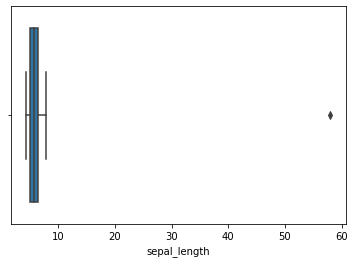

In [23]:
sns.boxplot(data['sepal_length'])

Giving the data visualisation of this column, it seems that the outlier must've been introduced with a **typo** (should be 5.8 instead of 58) because the rest of the values are between 4 and 6.

In [24]:
for x in data['sepal_length']:
    if x > 6:
        result = x / 10
        data['sepal_length'] = data['sepal_length'].replace(x, result)

D:\Programes\Anaconda3\envs\class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

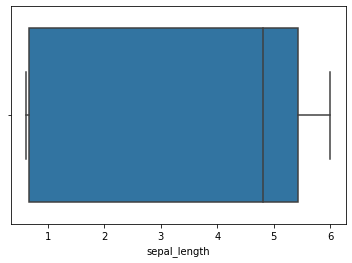

In [25]:
sns.boxplot(data['sepal_length'])

# Plot a correlation matrix with a heatmap between the numeric features.

In [26]:
numerical = data._get_numeric_data()

corre_matrix = numerical.corr()
corre_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.109274,-0.652850,-0.626449
sepal_width,0.109274,1.000000,-0.424049,-0.360509
petal_length,-0.652850,-0.424049,1.000000,0.961975
petal_width,-0.626449,-0.360509,0.961975,1.000000


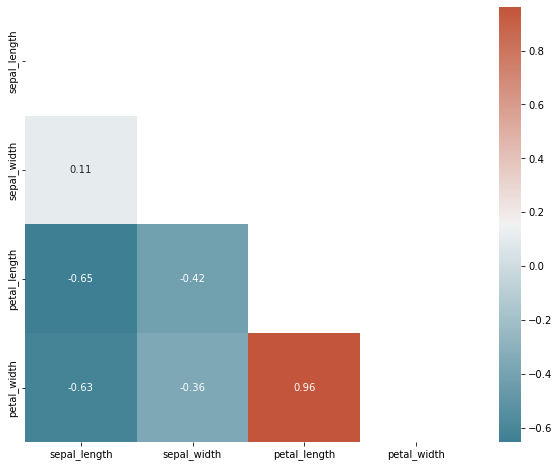

In [27]:
mask = np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corre_matrix, mask = mask, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True));

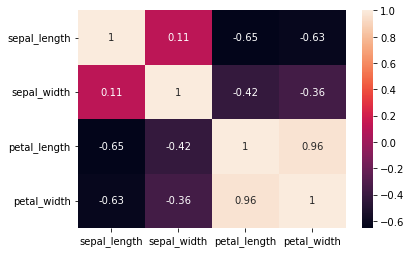

In [28]:
sns.heatmap(corre_matrix, annot = True);

There is a very strong relation between columns **'petal_width'** and **'petal_length'**.

# Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [29]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
# Before extracting the target variable, we'll convert the values 
# from the 'class' column to ternary:

def ternary(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else:
        return 2

In [31]:
data['class'] = data['class'].apply(ternary)

In [32]:
data['class'].value_counts()

1    50
2    50
0    48
Name: class, dtype: int64

In [33]:
# Extracting the target variable:

y = data['class']

In [34]:
# Extracting the independent variables:

X = data.drop(['class'], axis = 1)

In [35]:
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


Looking at the numerical columns, I've decided **not to scale** them because the **dispersion** between values is **low**.

In [36]:
# Train Test splitting:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [37]:
y_train.value_counts()

2    36
0    34
1    33
Name: class, dtype: int64

In [38]:
y_test.value_counts()

1    17
0    14
2    14
Name: class, dtype: int64

In [39]:
# Defining the Logistic Regression Model (classification):

classification = LogisticRegression(max_iter = 500)

In [40]:
classification.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [41]:
# Model evaluation:

y_test_pred = classification.predict(X_test)

In [42]:
round(accuracy_score(y_test, y_test_pred), 2)

0.91

In [43]:
confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  2, 12]], dtype=int64)

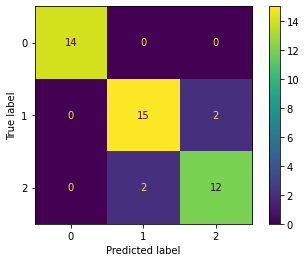

In [44]:
cmx = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cmx)
disp.plot();

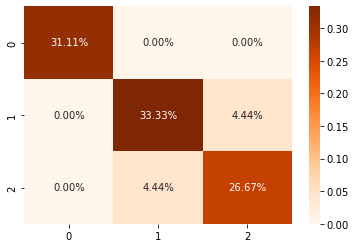

In [45]:
sns.heatmap(cmx / np.sum(cmx), annot = True, fmt = '.2%', cmap = 'Oranges');

# BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

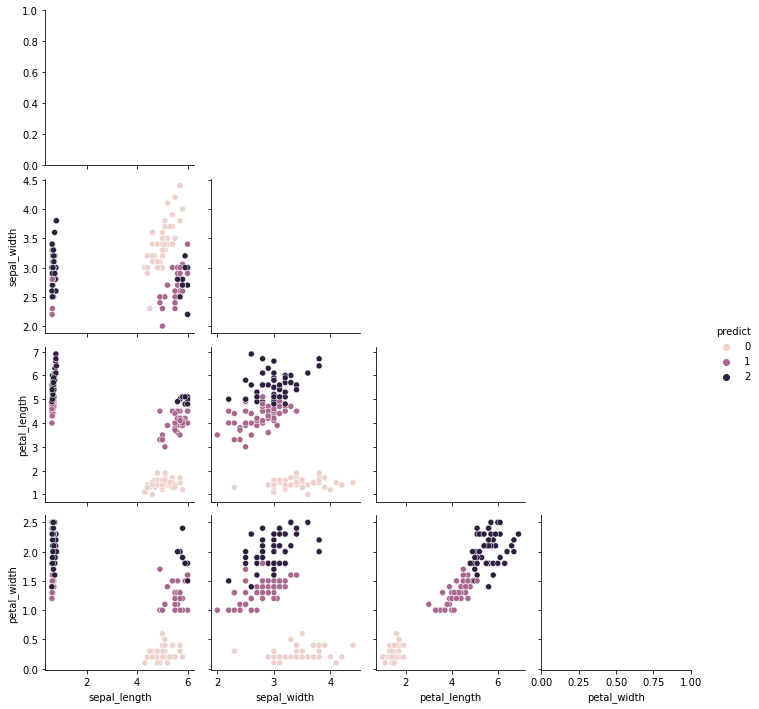

In [46]:
X['predict'] = classification.predict(X)
sns.pairplot(X, hue = "predict", corner = True, diag_kind = 'None')
plt.show()